# Approach 1

In [67]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [55]:
df= pd.read_csv("LasVegasTripAdvisorReviews-Dataset.csv", sep=';')
df = df.drop(['User country'], axis=1)

print(df.shape)

(504, 19)


In [56]:
categorical = list(df.select_dtypes(include=['object']).columns.values)
le = preprocessing.LabelEncoder()
# seasons in place of months
['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
df['Period of stay'] = df['Period of stay'].map({'Dec-Feb':'winter', 'Mar-May':'spring', 'Jun-Aug' :'summer','Sep-Nov':'autumn'})

for i in range(0, len(categorical)):
  #  df[categorical[i]] = le.fit_transform(df[categorical[i]])
    print(df[categorical[i]].unique())

['winter' 'spring' 'summer' 'autumn']
['Friends' 'Business' 'Families' 'Solo' 'Couples']
['NO' 'YES']
['YES' 'NO']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']
['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 'The Cromwell'
 'Encore at wynn Las Vegas' 'Hilton Grand Vacations on the Boulevard'
 "Marriott's Grand Chateau" 'Tuscany Las Vegas Suites & Casino'
 'Hilton Grand Vacations at the Flamingo' 'Wyndham Grand Desert'
 'The Venetian Las Vegas Hotel' 'Bellagio Las Vegas' 'Paris Las Vegas'
 'The Westin las Vegas Hotel Casino & Spa']
['3' '4' '5' '4,5' '3,5']
['North America' 'Europe' 'Asia' 'Oceania' 'Africa' 'South America']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'O

In [57]:
for i in range(0, len(categorical)):
    df[categorical[i]] = le.fit_transform(df[categorical[i]])
df.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,11,4,13,5,3,3,0,1,0,0,1,1,2,0,3773,3,9,4,4
1,119,21,75,3,3,0,0,1,0,0,1,1,2,0,3773,3,3,4,0
2,36,9,25,5,1,2,0,1,0,0,1,1,2,0,3773,3,2,3,2
3,14,7,14,4,1,3,0,1,0,0,1,1,2,0,3773,2,6,3,0
4,5,5,2,4,1,4,0,1,0,0,1,1,2,0,3773,3,7,7,5


In [58]:
# fill biến không hợp lệ bằng median
df.loc[df[df['Member years']<0].index, 'Member years']= np.NaN
df['Member years'].fillna(df['Member years'].median(), inplace=True)

In [60]:
X = df.drop('Score', axis=1)
y = df['Score']

In [61]:
df['Score'].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

In [83]:
## prepare train and test labels
from sklearn.model_selection import train_test_split
X = df.drop(['Score'], axis=1)
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = df['Score'])

### Run model

In [78]:
from sklearn.model_selection import cross_val_score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        print("_______________________________________________")
        scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


In [79]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='entropy', 
                                 max_depth=4, 
                                 random_state=42)
dt_clf.fit(X_train, y_train)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 54.50%
_______________________________________________
CLASSIFICATION REPORT:
                  1          2          3           4           5  accuracy  \
precision  0.285714   0.500000   0.800000    0.539683    0.544828  0.544974   
recall     0.250000   0.173913   0.148148    0.276423    0.929412  0.544974   
f1-score   0.266667   0.258065   0.250000    0.365591    0.686957  0.544974   
support    8.000000  23.000000  54.000000  123.000000  170.000000  0.544974   

            macro avg  weighted avg  
precision    0.534045      0.571395  
recall       0.355579      0.544974  
f1-score     0.365456      0.484971  
support    378.000000    378.000000  
_______________________________________________
Confusion Matrix: 
 [[  2   0   2   1   3]
 [  1   4   0   3  15]
 [  0   2   8  15  29]
 [  2   2   0  34  85]
 [  2   0   0  10 158]]

_______________________________________________
Accuracy: 0.37 (+/- 0.22)


In [81]:
from sklearn.naive_bayes import GaussianNB
nb =  GaussianNB(var_smoothing=0.9)
nb.fit(X_train, y_train)
print_score(nb, X_train, y_train, X_test, y_test, train=True)
print_score(nb, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 44.97%
_______________________________________________
CLASSIFICATION REPORT:
             1     2     3      4           5  accuracy   macro avg  \
precision  0.0   0.0   0.0    0.0    0.449735  0.449735    0.089947   
recall     0.0   0.0   0.0    0.0    1.000000  0.449735    0.200000   
f1-score   0.0   0.0   0.0    0.0    0.620438  0.449735    0.124088   
support    8.0  23.0  54.0  123.0  170.000000  0.449735  378.000000   

           weighted avg  
precision      0.202262  
recall         0.449735  
f1-score       0.279033  
support      378.000000  
_______________________________________________
Confusion Matrix: 
 [[  0   0   0   0   8]
 [  0   0   0   0  23]
 [  0   0   0   0  54]
 [  0   0   0   0 123]
 [  0   0   0   0 170]]

_______________________________________________
Accuracy: 0.45 (+/- 0.02)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
# print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


MAE: 0.7374
MSE: 0.8565
R2 Score: 0.1534


# Approach 2

In [ ]:
# read data from csv file
df= pd.read_csv("D:/Data/Viettel/Project 1/LasVegasTripAdvisorReviews-Dataset.csv", sep=';')
df = df.drop(['User country'], axis=1)
print(df.shape)

(504, 20)


In [ ]:
# fill biến không hợp lệ bằng median
df.loc[df[df['Member years']<0].index, 'Member years']= np.NaN
df['Member years'].fillna(df['Member years'].median(), inplace=True)

In [ ]:
df.replace(to_replace={'3':3,'4':4,'5':5,'3,5':3.5,'4,5':4.5},inplace=True)

In [ ]:
categorical = list(df.select_dtypes(include=['object']).columns.values)
categorical

['Period of stay',
 'Traveler type',
 'Pool',
 'Gym',
 'Tennis court',
 'Spa',
 'Casino',
 'Free internet',
 'Hotel name',
 'User continent',
 'Review month',
 'Review weekday']

In [ ]:
le = preprocessing.LabelEncoder()
# seasons in place of months
['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
df['Period of stay'] = df['Period of stay'].map({'Dec-Feb':'winter', 'Mar-May':'spring', 'Jun-Aug' :'summer','Sep-Nov':'autumn'})

for i in range(0, len(categorical)):
  #  df[categorical[i]] = le.fit_transform(df[categorical[i]])
    print(df[categorical[i]].unique())

['winter' 'spring' 'summer' 'autumn']
['Friends' 'Business' 'Families' 'Solo' 'Couples']
['NO' 'YES']
['YES' 'NO']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']
['YES' 'NO']
['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel' 'Caesars Palace'
 'The Cosmopolitan Las Vegas' 'The Palazzo Resort Hotel Casino'
 'Wynn Las Vegas' 'Trump International Hotel Las Vegas' 'The Cromwell'
 'Encore at wynn Las Vegas' 'Hilton Grand Vacations on the Boulevard'
 "Marriott's Grand Chateau" 'Tuscany Las Vegas Suites & Casino'
 'Hilton Grand Vacations at the Flamingo' 'Wyndham Grand Desert'
 'The Venetian Las Vegas Hotel' 'Bellagio Las Vegas' 'Paris Las Vegas'
 'The Westin las Vegas Hotel Casino & Spa']
['North America' 'Europe' 'Asia' 'Oceania' 'Africa' 'South America']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'Decemb

In [ ]:
for i in range(0, len(categorical)):
    df[categorical[i]] = le.fit_transform(df[categorical[i]])
df.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,11,4,13,5,3,3,0,1,0,0,1,1,2,3.0,3773,3,9.0,4,4
1,119,21,75,3,3,0,0,1,0,0,1,1,2,3.0,3773,3,3.0,4,0
2,36,9,25,5,1,2,0,1,0,0,1,1,2,3.0,3773,3,2.0,3,2
3,14,7,14,4,1,3,0,1,0,0,1,1,2,3.0,3773,2,6.0,3,0
4,5,5,2,4,1,4,0,1,0,0,1,1,2,3.0,3773,3,7.0,7,5


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Oversampling & Data Splitting

In [ ]:
# X = df[['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Period of stay',
#        'Traveler type', 'Hotel name', 'Hotel stars', 'Nr. rooms',
#        'User continent', 'Member years', 'Review month', 'Review weekday']]
X = df.drop('Score', axis=1)
y = df['Score']

In [ ]:
df['Score'].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

In [ ]:
from pandas.core.common import random_state
from imblearn.combine import SMOTEENN
smtn = SMOTEENN(random_state = 0)
smtn.fit(X, y)
X, y = smtn.fit_resample(X, y)
y.value_counts()

1    162
2    122
3     95
4     35
5     32
Name: Score, dtype: int64

In [ ]:
## prepare train and test labels
from sklearn.model_selection import train_test_split
X = df.drop(['Score'], axis=1)
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Run model

In [ ]:
# import libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(10, 6)):
    y_proba = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             1     2     3      4      5  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
support    8.0  23.0  54.0  123.0  170.0       1.0      378.0         378.0
_______________________________________________
Confusion Matrix: 
 [[  8   0   0   0   0]
 [  0  23   0   0   0]
 [  0   0  54   0   0]
 [  0   0   0 123   0]
 [  0   0   0   0 170]]

Test Result:
Accuracy Score: 44.44%
_______________________________________________
CLASSIFICATION REPORT:
             1    2          3          4          5  accuracy   macro avg  \
precision  0.0  0.0   0.166667   0.340909   0.526316  0.444444    0.206778   
recall     0.0  0.0   0.055556   0.365854   0.701754  0.444444 

In [ ]:
# Random Forest AUC
y_pred_proba = rf_clf.predict_proba(X_test)
micro_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print('Micro-averaged AUC: %.3f' % micro_auc)

Micro-averaged AUC: 0.632


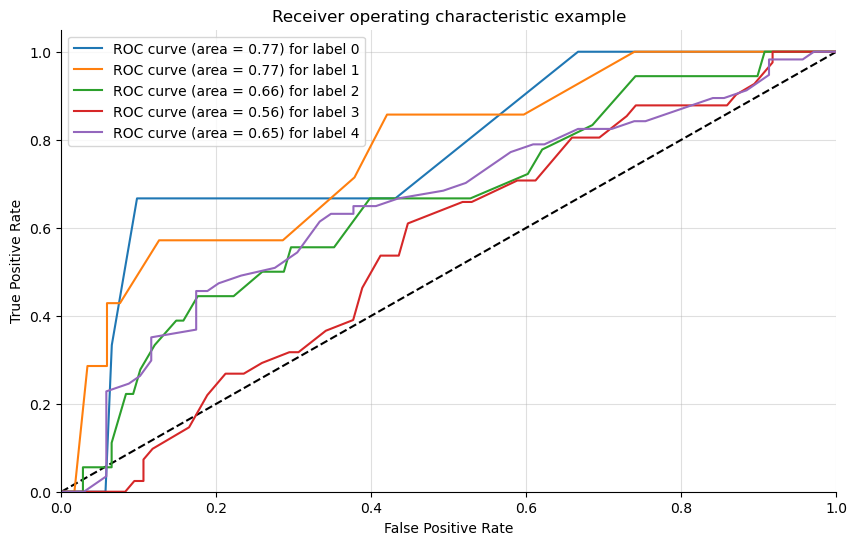

In [ ]:
#roc curve
plot_multiclass_roc(rf_clf, X_test, y_test, 5)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='distance',
                           algorithm='kd_tree',
                           n_jobs=-1)
knn.fit(X_train,y_train)
y_predknn = knn.predict(X_test)
print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             1     2     3      4      5  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0    1.0    1.0       1.0        1.0           1.0
support    8.0  23.0  54.0  123.0  170.0       1.0      378.0         378.0
_______________________________________________
Confusion Matrix: 
 [[  8   0   0   0   0]
 [  0  23   0   0   0]
 [  0   0  54   0   0]
 [  0   0   0 123   0]
 [  0   0   0   0 170]]

Test Result:
Accuracy Score: 45.24%
_______________________________________________
CLASSIFICATION REPORT:
             1    2          3          4          5  accuracy   macro avg  \
precision  0.0  0.0   0.363636   0.400000   0.493333  0.452381    0.251394   
recall     0.0  0.0   0.222222   0.390244   0.649123  0.452381 

In [ ]:
# KNN
y_pred_proba = knn.predict_proba(X_test)
micro_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print('Micro-averaged AUC: %.3f' % micro_auc)

Micro-averaged AUC: 0.595


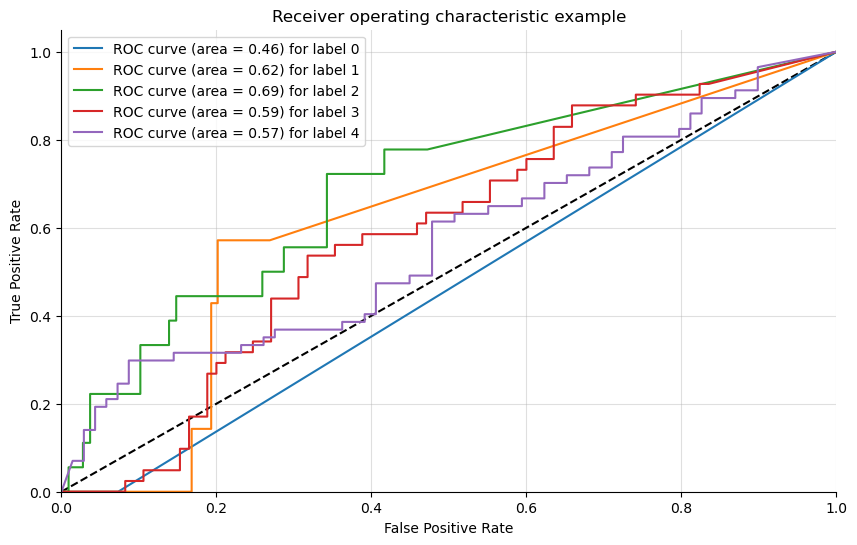

In [ ]:
#roc curve
plot_multiclass_roc(knn, X_test, y_test, 5)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.41%
_______________________________________________
CLASSIFICATION REPORT:
             1     2          3          4           5  accuracy   macro avg  \
precision  1.0   1.0   1.000000    0.98374    0.976879  0.984127    0.992124   
recall     1.0   1.0   0.944444    0.98374    0.994118  0.984127    0.984460   
f1-score   1.0   1.0   0.971429    0.98374    0.985423  0.984127    0.988118   
support    8.0  23.0  54.000000  123.00000  170.000000  0.984127  378.000000   

           weighted avg  
precision      0.984310  
recall         0.984127  
f1-score       0.984071  
support      378.000000  
_______________________________________________
Confusion Matrix: 
 [[  8   0   0   0   0]
 [  0  23   0   0   0]
 [  0   0  51   1   2]
 [  0   0   0 121   2]
 [  0   0   0   1 169]]

Test Result:
Accuracy Score: 42.06%
_______________________________________________
CLASSIFICATION REPORT:
             1         2          3          4          5  accuracy  

In [ ]:
# Gradient Boosting AUC
y_pred_proba = gb_clf.predict_proba(X_test)
micro_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print('Micro-averaged AUC: %.3f' % micro_auc)

Micro-averaged AUC: 0.604


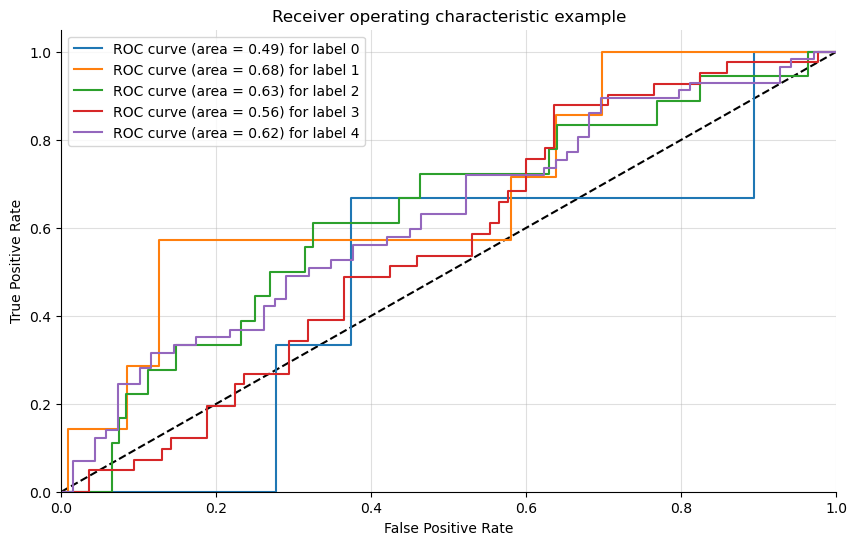

In [ ]:
#roc curve
plot_multiclass_roc(gb_clf, X_test, y_test, 5)

### XGBoost

In [ ]:
import xgboost as xgb

expected_classes = np.arange(5)
unique_values = np.unique(y_train)
if not np.array_equal(unique_values, expected_classes):
    # Convert the y array to integers using a dictionary mapping
    class_mapping = {c: i for i, c in enumerate(unique_values)}
    y_train = np.array([class_mapping[c] for c in y_train])
    y_test = np.array([class_mapping[c] for c in y_test])
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            learning_rate=0.1, 
                            max_depth=3, 
                            n_estimators=100)

xgb_clf.fit(X_train, y_train)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.95%
_______________________________________________
CLASSIFICATION REPORT:
                  0          1          2           3           4  accuracy  \
precision  1.000000   1.000000   1.000000    0.909091    0.860104  0.899471   
recall     0.875000   0.869565   0.685185    0.894309    0.976471  0.899471   
f1-score   0.933333   0.930233   0.813187    0.901639    0.914601  0.899471   
support    8.000000  23.000000  54.000000  123.000000  170.000000  0.899471   

            macro avg  weighted avg  
precision    0.953839      0.907502  
recall       0.860106      0.899471  
f1-score     0.898599      0.897243  
support    378.000000    378.000000  
_______________________________________________
Confusion Matrix: 
 [[  7   0   0   1   0]
 [  0  20   0   0   3]
 [  0   0  37   6  11]
 [  0   0   0 110  13]
 [  0   0   0   4 166]]

Test Result:
Accuracy Score: 43.65%
_______________________________________________
CLASSIFICATION REPORT:
             0

In [ ]:
# XGBoost AUC
y_pred_proba = xgb_clf.predict_proba(X_test)
micro_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print('Micro-averaged AUC: %.3f' % micro_auc)

Micro-averaged AUC: 0.635


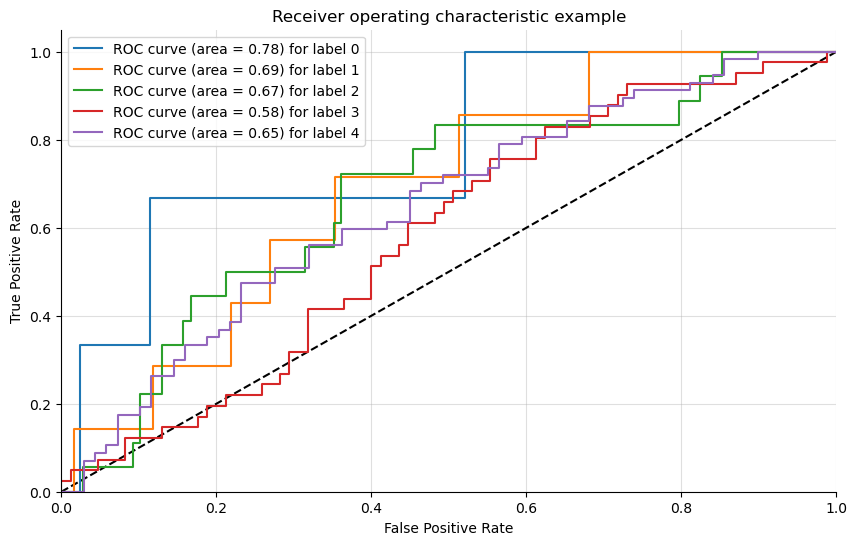

In [ ]:
#roc curve
plot_multiclass_roc(xgb_clf, X_test, y_test, 5)

### Support Vector Machine

In [ ]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 44.97%
_______________________________________________
CLASSIFICATION REPORT:
             0     1     2      3           4  accuracy   macro avg  \
precision  0.0   0.0   0.0    0.0    0.449735  0.449735    0.089947   
recall     0.0   0.0   0.0    0.0    1.000000  0.449735    0.200000   
f1-score   0.0   0.0   0.0    0.0    0.620438  0.449735    0.124088   
support    8.0  23.0  54.0  123.0  170.000000  0.449735  378.000000   

           weighted avg  
precision      0.202262  
recall         0.449735  
f1-score       0.279033  
support      378.000000  
_______________________________________________
Confusion Matrix: 
 [[  0   0   0   0   8]
 [  0   0   0   0  23]
 [  0   0   0   0  54]
 [  0   0   0   0 123]
 [  0   0   0   0 170]]

Test Result:
Accuracy Score: 45.24%
_______________________________________________
CLASSIFICATION REPORT:
             0    1     2     3          4  accuracy   macro avg  weighted avg
precision  0.0  0.0   0.0   0.0   0

In [ ]:
# SVM AUC
conf_scores = svm_clf.decision_function(X_test)

# convert confidence scores to probabilities using softmax
prob_scores = np.exp(conf_scores) / np.sum(np.exp(conf_scores), axis=1, keepdims=True)

# calculate micro-averaged AUC
micro_auc = roc_auc_score(y_test, prob_scores, multi_class='ovr', average='weighted')
print('Micro-averaged AUC: %.3f' % micro_auc)

Micro-averaged AUC: 0.548


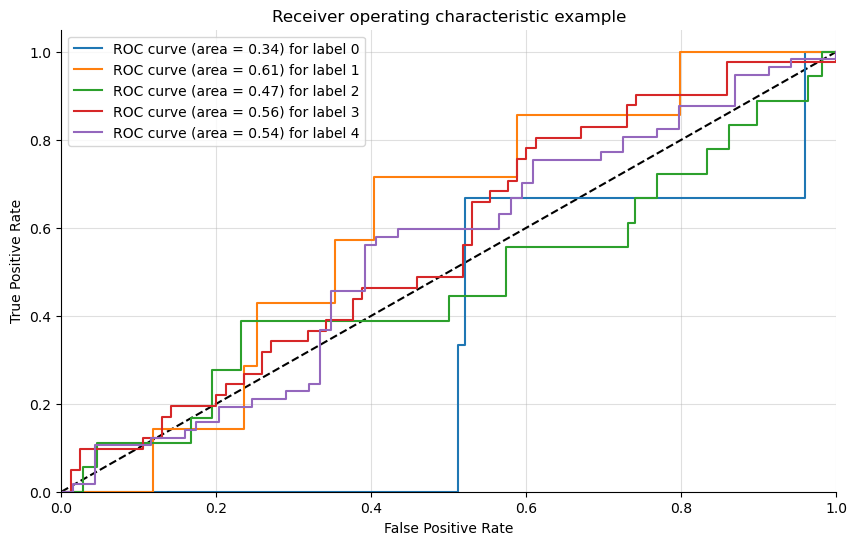

In [ ]:
#roc curve
plot_multiclass_roc(svm_clf, X_test, y_test, 5)